@channel **Hello Everyone,**

**2024-01-30 `21.1-Neural-Networks-Deep-Learning-Introduction to Advanced Machine Learning`**

Now we learn one of the most interesting and groundbreaking models out there 'tensorflow'.  Basically, tensorflow attempts to work like the human brain!  While it really isn't nearly as powerful as a human brain, it does provide amazing results.  We will interact with Tensorflow models using 'Keras'.

* [Great PBS video on Neural Networks](https://www.youtube.com/watch?time_continue=11&v=oV3ZY6tJiA0&feature=emb_title)
* [Tensorflow Playground](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.10587&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&discretize_hide=true&regularization_hide=true&learningRate_hide=true&regularizationRate_hide=true&percTrainData_hide=true&showTestData_hide=true&noise_hide=true&batchSize_hide=true)
* [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb)
* [Nice Neural Network explanation](https://www.explainthatstuff.com/introduction-to-neural-networks.html)
* [Very nice (kind of long) Keras Tutorial](https://elitedatascience.com/keras-tutorial-deep-learning-in-python)
* [Shorter Keras tutorial and example](https://victorzhou.com/blog/keras-neural-network-tutorial/)
* [But what is a neural network? | Chapter 1, Deep learning](https://www.youtube.com/watch?v=aircAruvnKk)
* [Deep Learning Lecture 3: Hands-On in the Playground](https://www.youtube.com/watch?v=ru9dXF04iSE)

**Objectives**

* Compare the differences between the traditional machine learning classification and regression models and the neural network models.
* Describe the perceptron model and its components.
* Implement neural network models using TensorFlow.

**Presentation**
* [21.1 Introduction to Advanced Machine Learning](https://git.bootcampcontent.com/University-of-California---Berkeley/UCB-VIRT-DATA-PT-08-2023-U-LOLC/-/blob/main/Slides/Data-21.1-Introduction_to_Advanced_Machine_Learning.pdf)

**Install**
```
# Requires the latest pip
python.exe -m pip install --upgrade pip

# Current stable release for CPU and GPU
pip install tensorflow
```

[Install TensorFlow 2](https://www.tensorflow.org/install/)

**Best wishes.**

# ==========================================

### Instructor Do: Surfing the Neural Net (0:05)

---
### Instructor Do: What is a Neural Network? (0:15)

# ==========================================

### 1.01 Students Do: Working Through the Logistics (15 min)

# Work Through Logistics
In this activity, you'll use a logistic regression to categorize data from the `make_blobs` function from scikit-learn to create data.
## Instructions
* Use the starter code provided to create your `make_blobs` dataset from scikit-learn.
* Split your dataset into training and testing sets using scikit-learn's `train_test_split` module.
* Create a LogisticRegression instance from scikit-learn's `LogisticRegression` model.
## Hint
  * If you need a reminder on how to create a `LogisticRegression` model, review the [Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
* Train your `LogisticRegression` model on the training dataset.
* Evaluate your trained `LogisticRegression` model using the `accuracy_score` metric from scikit-learn.

---

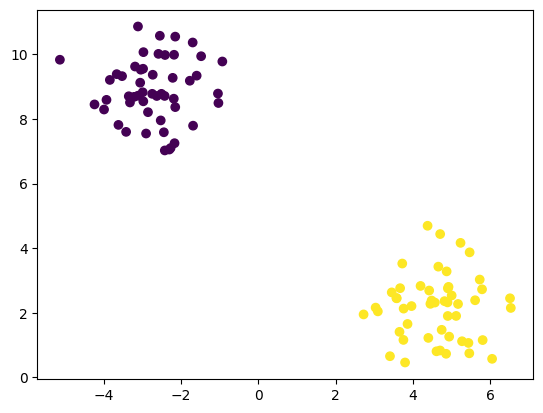

In [30]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd

# Generate dummy dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [31]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [3]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [32]:
from sklearn.metrics import accuracy_score
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 1.000


# ==========================================

### 1.02 Everyone Do: Work Through a Neural Network Workflow (0:20)

In [5]:
# !python.exe -m pip install --upgrade pip
# !pip install tensorflow

In [6]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

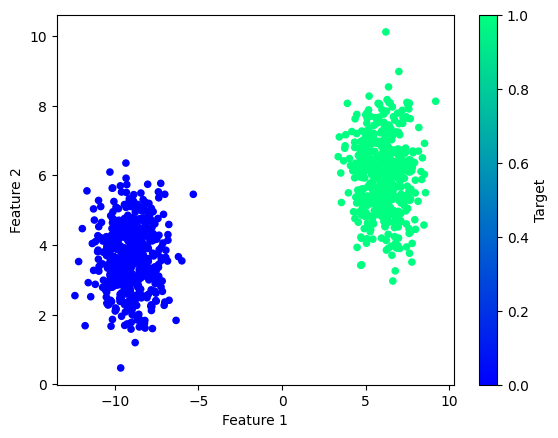

In [7]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")
plt.show()

In [8]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [11]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

In [12]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [13]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7621 - accuracy: 0.3293
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.5120
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5587
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.6120
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.6680
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7187
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7733
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5464 - accuracy: 0.8400
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.8933
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.9280
Epoch 11/

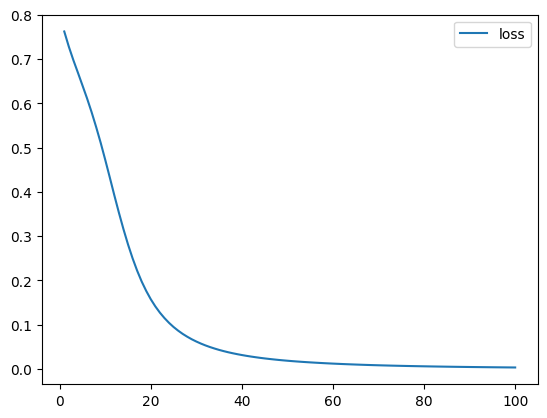

In [15]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

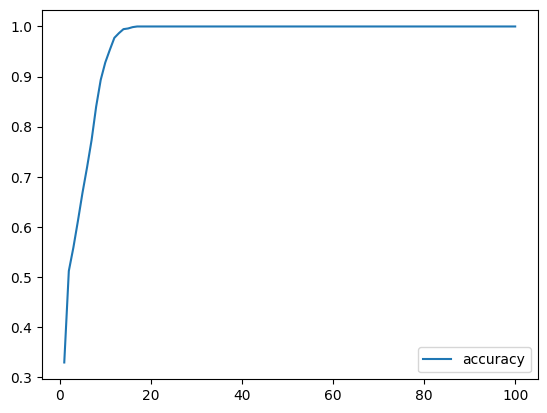

In [16]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0032 - accuracy: 1.0000 - 117ms/epoch - 15ms/step
Loss: 0.003173678880557418, Accuracy: 1.0


# ==========================================

### 1.03 Student Do: BYONNM - Build Your Own Neural Network Model (0:20)

# Bring Your Own Neural Network Model
In this activity, you'll use a neural network model to classify the data from `make_blobs`.
## Instructions
  * Using the starter code provided, visualize the blobs dummy dataset using a Pandas scatter plot.
  * Randomly split the dummy data into training and test datasets using scikit-learn's `train_test_split` method.
  * Normalize both datasets using scikit-learn's `StandardScaler` class.
  * Using the Keras module, create a basic neural network with five neurons in the hidden layer.
    * **Note:** Your neural network should use two inputs and produce one classification output.
  * Compile your basic neural network model.
  * Train the neural network model over 50 epochs.
  * Evaluate the performance of your model by printing your test loss metric and determining the predictive accuracy of the model on the test dataset.
## Bonus
* Create a new neural network with a different number of neurons.
* Train the new neural network model on the same training data and test the performance on the same testing dataset.
* Create a line plot that visualizes the neural network predictive accuracy over each epoch.

---

In [33]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

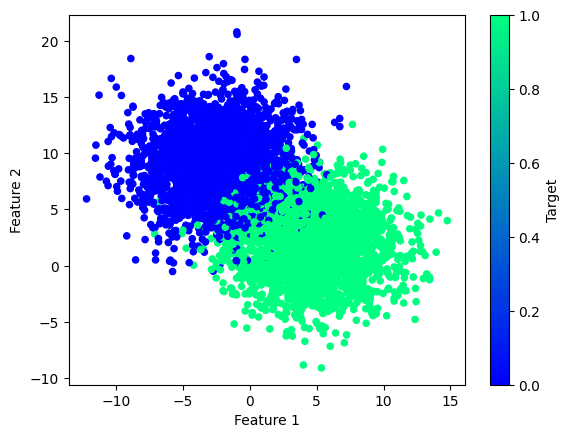

In [34]:
# Generate dummy dataset
X, y = make_blobs(n_samples=5000, centers=2, n_features=2, random_state=42, cluster_std=3)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")
plt.show()

In [35]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [36]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [56]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

In [57]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=4, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=3, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [58]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 15        
                                                                 
 dense_13 (Dense)            (None, 4)                 24        
                                                                 
 dense_14 (Dense)            (None, 3)                 15        
                                                                 
 dense_15 (Dense)            (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
118/118 [==============================] - 2s 3ms/step - loss: 0.6292 - accuracy: 0.6427
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.8731
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.9424
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.9480
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.9504
Epoch 6/50
118/118 [==============================] - 0s 4ms/step - loss: 0.2797 - accuracy: 0.9507
Epoch 7/50
118/118 [==============================] - 0s 4ms/step - loss: 0.1714 - accuracy: 0.9504
Epoch 8/50
118/118 [==============================] - 0s 3ms/step - loss: 0.1320 - accuracy: 0.9509
Epoch 9/50
118/118 [==============================] - 0s 4ms/step - loss: 0.1304 - accuracy: 0.9504
Epoch 10/50
118/118 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9509

In [61]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.1235 - accuracy: 0.9544 - 320ms/epoch - 8ms/step
Loss: 0.12353236228227615, Accuracy: 0.9544000029563904


In [70]:
y_hat

array([0.00926339], dtype=float32)

In [72]:
[x[0] for x in y_hat]

[0.009263387,
 0.9999978,
 0.0034713023,
 0.08122968,
 0.99955094,
 0.96115863,
 0.8943219,
 0.0033830453,
 0.01665544,
 0.9988147,
 0.8528537,
 0.005472502,
 0.8672493,
 0.042453773,
 0.9937258,
 0.86793333,
 0.9951625,
 0.99949884,
 0.9576639,
 0.029548531,
 0.8621815,
 0.9999847,
 0.6724859,
 0.011484907,
 0.014533572,
 0.9947137,
 0.9985162,
 0.98553693,
 0.24102153,
 0.99963343,
 0.9709878,
 0.00023711316,
 0.9907354,
 0.9338529,
 0.0006829994,
 0.9983184,
 0.013556658,
 0.023325652,
 0.9124776,
 0.0009734589,
 0.74502516,
 0.0031033696,
 0.0022343157,
 0.96544665,
 0.992084,
 0.0021272204,
 0.9998545,
 0.0035795595,
 0.8922546,
 0.0008157398,
 0.9992949,
 0.00024599093,
 0.9650629,
 0.99921435,
 0.00096127205,
 0.007369924,
 0.88470554,
 0.2687568,
 0.99771374,
 0.8604735,
 0.6870737,
 0.9955624,
 0.03168371,
 0.0007042026,
 0.0050349934,
 0.0004177106,
 0.0020947312,
 0.04671058,
 0.9764545,
 0.002698611,
 0.9241252,
 0.98261267,
 0.9998176,
 0.9969598,
 0.0054323766,
 0.9836938

In [71]:
y_hat = nn_model.predict(X_test_scaled, verbose=2)
y_preds = (y_hat > 0.5)
y_preds

40/40 - 0s - 98ms/epoch - 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

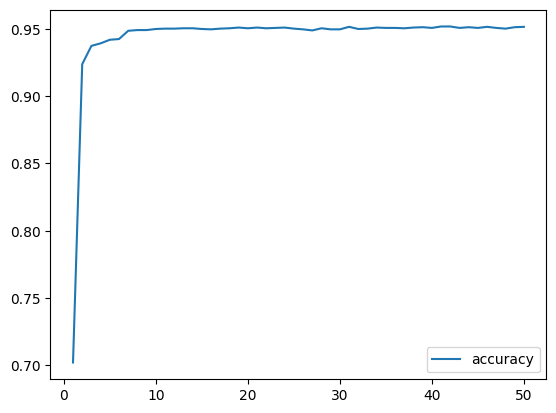

In [53]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "21.1-Neural-Networks-Deep-Learning-Introduction to Advanced Machine Learning"
objectives = [
    "Compare the differences between the traditional machine learning classification and regression models and the neural network models",
    "Describe the perceptron model and its components",
    "Implement neural network models using TensorFlow",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))